# SIMULACIÓN | LABORATORIO 5


## Boostrap o remuestreo

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy 
from IPython.display import display, Math
import ipywidgets as widgets
import random
import scipy.stats as stats
import statistics

### Ejercicio 1
En un estudio sobre plantaciones de coihue, se ha recopilado información sobre la altura que alcanzan dichos árboles a los 20 años de edad, en diversas zonas de la región sur austral de Chile. A partir de dichos datos, estamos interesados en calcular un intervalo de confianza para la mediana de altura que alcanza esta especie a los 20 años de edad.
Para ello utilizaremos remuestreo o bootstrap.
1. Analice el código y evalue el número de muestras de bootstrap para alcanzar convergencia de la varianza estimada de la mediana.
2. Calcule el error cuadrático medio de la mediana.
3. Escoja otro estadístico de la muestra y calcule su incerteza con la técnica de boostrap
4. Compare y comente sus resultados.

In [2]:
datos = [12.5,11.4,18.4,10.7,9.5,11.7,15.4,12.3,18.6, 14.7, 10.7,11.6, 10.1, 8.2, 11.4,21.1, 12.1, 7.5, 12.5, 14.7, 10.3, 5.4, 9.4, 13.8, 9.6, 11.3, 14.8, 12.6]
n = len(datos)

### Análisis del código

In [3]:
m = statistics.median(datos) # Calculamos la mediana
print (m)
b=100 # Número de muestras que tomaremos bootstrap
mm = 0 # Esto creo que no sirve para nada (no se utiliza)
mn =[] # Variable que nos servirá para almacenar la mediana de cada muestra
for i in range(b): # Ciclo que nos permitirá tomar las muestras bootstrap
    dat = np.random.choice(list(datos),size=n,replace=True) # Tomamos la muestra bootstrap
    mn.append(statistics.median(dat)) # Calculamos la mediana de la muestra bootstrap y la almacenamos
    
var = statistics.variance(mn) # Calculamos la varianza de las medianas de las muestras bootstrap
print(var)
rango = 1.96*math.sqrt(var) # Calculamos para un alpha = 0.05 el rango de confianza, en este caso 95% de confianza, por lo que 1.96 es el valor sacado de la tabla de distribución normal
display(Math('%0.2f \pm %0.2f' % (m, rango ))) # Imprimimos el resultado de la mediana y el rango de confianza

11.649999999999999
0.2488068181818182


<IPython.core.display.Math object>

### Respuesta 1.0) Preparamos los datos, para visualizarlos mejor.


In [4]:
# --- Creamos el dataframe ---
df = pd.DataFrame({'Altura_coihue':datos})
df.describe()

,Altura_coihue
count,28.000000
mean,12.225000
std,3.401811
min,5.400000
25%,10.250000
50%,11.650000
75%,14.025000
max,21.100000


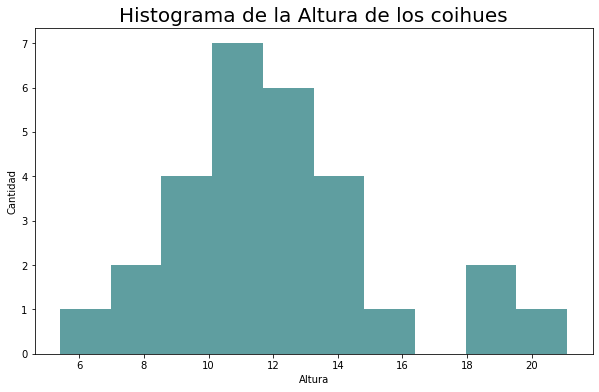

In [5]:
# --- Graficamos ---
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(datos, bins = 10, color='cadetblue')
# --- Información de la gráfica ---
ax.set_title('Histograma de la Altura de los coihues', fontsize=20); ax.set_ylabel('Cantidad'); ax.set_xlabel('Altura');

### Respuesta 1.1) Analice el código y evalue el número de muestras de bootstrap para alcanzar convergencia de la varianza estimada de la mediana.
#### Análisis -> Se hizo en el código original

#### Convergencia

In [6]:
def simulacion_convergencia_mediana(datos, rango_simulacion=range(10,1000,10)):
    """
    Función que simula la convergencia de la varianza estimada de la mediana, utilizando el método bootstrap.
    Parámetros:
        datos: Lista de datos a utilizar | list
        rango_muestra: Rango de muestras a utilizar. (Por defecto: 10, 20, 30, ..., 990) | range
    Return (void):
        Gráfico de la convergencia de la varianza estimada de la mediana.
    """
    # --- Inicializamos las variables ---
    size_datos = len(datos)
    varianzas_all = []

    # --- Ciclo que nos permite simular la convergencia ---
    for size_muestra in rango_simulacion:
        varianzas_muestra = []

        # --- Ciclo que nos permite tomar muestras bootstrap ---
        for i in range(size_muestra):
            dat = np.random.choice(list(datos),size=n) # esto toma una lista de datos y la reemplaza por otra de la misma longitud
            varianzas_muestra.append(statistics.median(dat))
        
        varianzas_all.append(statistics.variance(varianzas_muestra))
    
    # --- Inicializamos el gráfico ---
    fig, ax = plt.subplots(figsize=(12, 8))
    # --- Graficamos ---
    ax.plot(rango_simulacion, varianzas_all, color='cadetblue')
    # --- Información de la gráfica ---
    ax.set_title('Convergencia de la varianza estimada de la mediana', fontsize=20); ax.set_ylabel('Varianza'); ax.set_xlabel('Tamaño de la muestra');


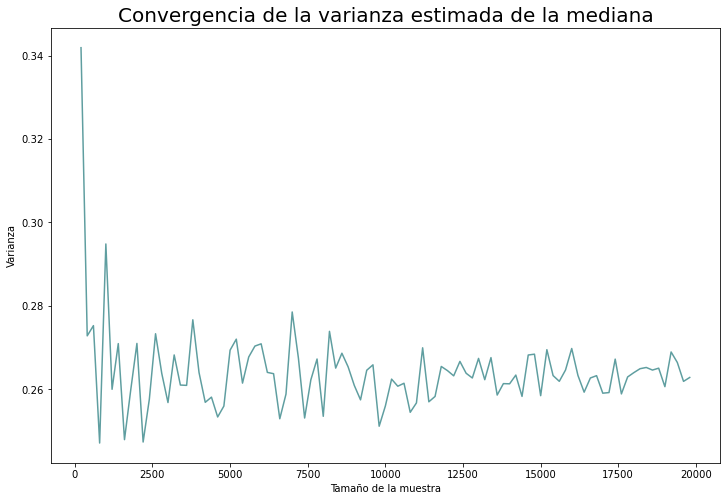

In [7]:
rango_simulacion = range(200,20000,200)
simulacion_convergencia_mediana(datos,rango_simulacion=rango_simulacion)

<p>Comienza a converger cercano a los 2500-5000, aún así permanece variable y pareciera estabilizarce pasados los 10 mil. Igual la variación después de las 2500-5000 iteraciones que tiene no pasa de 0.02, y a ratos por milesimas (0.001)</p>

### Respuesta 1.2) Calcule el error cuadrático medio de la mediana.

In [8]:
def simulacion_convergencia_mse_mediana(datos, rango_simulacion=range(10,1000,10)):
    """
    Función que simula la convergencia de la MSE mediana, utilizando el método bootstrap.
    Parámetros:
        datos: Lista de datos a utilizar | list
        rango_muestra: Rango de muestras a utilizar. (Por defecto: 10, 20, 30, ..., 990) | range
    Return (void):
        Gráfico de la convergencia MSE.
    """
    # --- Inicializamos las variables ---
    size_datos = len(datos)
    mediana_original = statistics.median(datos)
    mse_all = []

    # --- Ciclo que nos permite simular la convergencia ---
    for size_muestra in rango_simulacion:
        mse=0
        # --- Ciclo que nos permite tomar muestras bootstrap ---
        for i in range(size_muestra):
            dat = np.random.choice(list(datos),size=n) 
            mediana_predicha = statistics.median(dat)
            mse = mse + (mediana_predicha - mediana_original)**2
        mse = mse/size_muestra
        mse_all.append(mse)

    # --- Inicializamos el gráfico ---
    fig, ax = plt.subplots(figsize=(12, 8))
    # --- Graficamos ---
    ax.plot(rango_simulacion, mse_all, color='cadetblue')
    # --- Información de la gráfica ---
    ax.set_title('Convergencia del MSE mediana', fontsize=20); ax.set_ylabel('MSE'); ax.set_xlabel('Tamaño de la muestra');

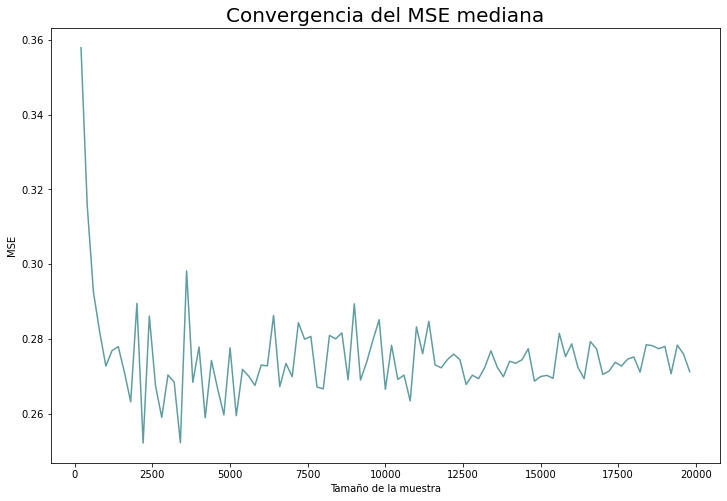

In [9]:
rango_simulacion = range(200,20000,200)
simulacion_convergencia_mse_mediana(datos,rango_simulacion=rango_simulacion)

### MSE para Media con 5000 muestras

In [10]:
mediana_original = statistics.median(datos)
muestras = 5000
mse=0
for muestra in range(muestras):
    dat = np.random.choice(list(datos),size=n)
    mediana_predicha = statistics.median(dat)
    
    # Sumatoria_MSE: E(y_pred - y_true)^2
    mse = mse + (mediana_predicha - mediana_original)**2

mse= mse/muestras # MSE = (1/muestras) * Sumatoria_MSE
print(f"El error cuadrático medio es : {mse}. Utilizando n muestras: {muestras}")

El error cuadrático medio es : 0.2688390000000023. Utilizando n muestras: 5000


<p>El error cuadrático medio (MSE) de la mediana está cercano a 0.27</p>

### Respuesta 1.3) Escoja otro estadístico de la muestra y calcule su incerteza con la técnica de boostrap
#### Media

In [11]:
def simulacion_convergencia_media_y_mse(datos, rango_simulacion=range(10,1000,10)):
    """
    Función que simula la convergencia de la varianza estimada de la media, utilizando el método bootstrap.
    Parámetros:
        datos: Lista de datos a utilizar | list
        rango_muestra: Rango de muestras a utilizar. (Por defecto: 10, 20, 30, ..., 990) | range
    Return (void):
        Gráfico de la convergencia de la varianza estimada de la media.
    """
    # --- Inicializamos las variables ---
    size_datos = len(datos)
    varianzas_all = []
    mse_all = []
    media_original = statistics.mean(datos)

    # --- Ciclo que nos permite simular la convergencia ---
    for size_muestra in rango_simulacion:
        varianzas_muestra = []
        mse=0

        # --- Ciclo que nos permite tomar muestras bootstrap ---
        for i in range(size_muestra):
            dat = np.random.choice(list(datos),size=n) # esto toma una lista de datos y la reemplaza por otra de la misma longitud
            media_predicha = statistics.mean(dat)
            varianzas_muestra.append(media_predicha)
            mse = mse + (media_predicha - media_original)**2
        
        varianzas_all.append(statistics.variance(varianzas_muestra))
        mse_all.append(mse/size_muestra)
    
    # --- Inicializamos el gráfico ---
    fig, ax = plt.subplots(1,2,figsize=(16, 8))
    # --- Graficamos ---
    ax[0].plot(rango_simulacion, varianzas_all, color='cadetblue')
    ax[1].plot(rango_simulacion, mse_all, color='cadetblue')
    # --- Información de la gráfica ---
    ax[0].set_title('Convergencia de la varianza estimada de la media', fontsize=20); ax[0].set_ylabel('Varianza'); ax[0].set_xlabel('Tamaño de la muestra');
    ax[1].set_title('Convergencia del MSE media', fontsize=20); ax[1].set_ylabel('MSE'); ax[1].set_xlabel('Tamaño de la muestra');

    print('Última iteración:')
    print('Varianza estimada de la media: ', varianzas_all[-1])
    print('MSE media: ', mse_all[-1])
    rango = 1.96*math.sqrt(varianzas_all[-1]) # Calculamos para un alpha = 0.05 el rango de confianza, en este caso 95% de confianza, por lo que 1.96 es el valor sacado de la tabla de distribución normal
    display(Math('%0.2f \pm %0.2f' % (media_original, rango ))) # Imprimimos el resultado de la media y el rango de confianza

Última iteración:
Varianza estimada de la media:  0.3952163299601263
MSE media:  0.39519654195011145


<IPython.core.display.Math object>

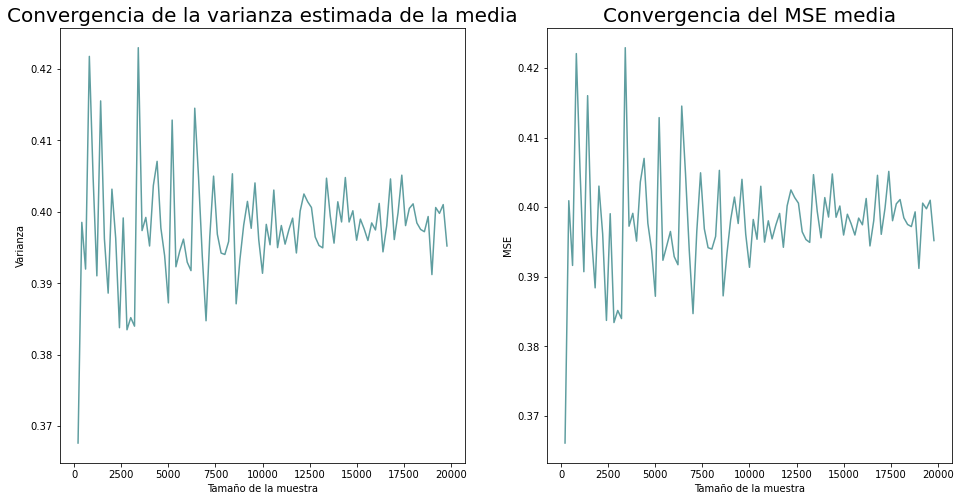

In [12]:
simulacion_convergencia_media_y_mse(datos, rango_simulacion=rango_simulacion)

#### Desviación estándar (para la 2)

In [26]:
# Como sabemos que entre 2500-5000 muestras es donde converge, tomamos 5000 muestras
muestras = 5000
desviacion_estandar_original = statistics.stdev(datos)
desviacion_estandar_all = []
mse=0
for muestra in range(muestras):
    dat = np.random.choice(list(datos),size=n)
    desviacion_estandar_predicha = statistics.stdev(dat)
    desviacion_estandar_all.append(desviacion_estandar_predicha)

    # Sumatoria_MSE: E(y_pred - y_true)^2
    mse = mse + (desviacion_estandar_predicha - desviacion_estandar_original)**2

mse= mse/muestras # MSE = (1/muestras) * Sumatoria_MSE
print(f"El error cuadrático medio es : {mse}. Utilizando n muestras: {muestras}")
print (f"La desviación estándar original es: {desviacion_estandar_original}")

var = statistics.variance(desviacion_estandar_all)
# varianza_desviacion_estandar = desviacion_estandar_all[-1]
rango = 1.96*math.sqrt(var)
display(Math('%0.2f \pm %0.2f' % (desviacion_estandar_original, rango )))

El error cuadrático medio es : 0.2950604986259511. Utilizando n muestras: 5000
La desviación estándar original es: 3.401810520122309


<IPython.core.display.Math object>

### Respuesta 1.4) Compare y comente sus resultados.
<p>A partir de 2500-5000 para el tamaño de muestra converge, nuevamente cercano a 10 mil parece estabilizarse mucho más. De todas formas permanece variable y no se acota mucho más que lo que se observa, el comportamiento es muy similar, por no decir igual, a las gráficas anteriores.</p>

### Ejercicio 2

Suponga que los datos previamente registrados provienen de una distribución normal de parámetros $(\mu,\sigma)$

1. Calcule los estimadores máximo verosímil de $\hat{\mu}$ y $\hat{\sigma}$
2. Utilice boostrap paramétrico para estimar la incerteza de $\hat{\mu}$ y $\hat{\sigma}$ . Estime el número de muestras para alcanzar convergencia en cada caso.
3. Compare y comente sus resultados.



In [14]:
#Respuesta 1

maxVerMu = statistics.mean(datos) #saca la media de los datos
maxVerSigma = statistics.stdev(datos) #Saca la dev estandar de los datos

print('Maxima verosimilitud de mu: ')
print(maxVerMu)
print('Máxima veorimilitud de sigma: ')
print(maxVerSigma)
#print(maxVerMu,maxVerSigma)


Maxima verosimilitud de mu: 
12.225
Máxima veorimilitud de sigma: 
3.401810520122309


In [15]:
#2 bootstrap

size = 28 #Tamaño de la muestra
listaVarMu = [] #Varianza de mu
listaVarSigma = [] #Varianza de sigma
for i in range(10,6000,100): #desde 10 hasta 6000 con un salto de 100 para ver cambios más precisos ( desde 1 daba un error ya que para sacar la varianza al final necesitaba de como mínimo 2 datos)
    mu1 = []
    sigma1 = []
    for j in range(i): #Va probando en cada iteración de i, i veces
        datos_norm = stats.norm.rvs(loc=maxVerMu, scale =maxVerSigma, size = size) #Generamos la normal 
        sigma1.append(statistics.stdev(datos_norm)) #Agregamos la desviación estandar
        mu1.append(statistics.mean(datos_norm)) #Agregamos la media

    listaVarSigma.append(statistics.variance(sigma1))
    listaVarMu.append(statistics.variance(mu1))

print(listaVarSigma,listaVarMu)

[0.1711586110292115, 0.1814630417915389, 0.24915450596577662, 0.2183089568329991, 0.21155046155827725, 0.1993513224695271, 0.2120598258243021, 0.21858978674114532, 0.23022340017955806, 0.21278760097864569, 0.19816697650855788, 0.2137833491488137, 0.21475814122758308, 0.20864325257469576, 0.20613282684776635, 0.21763623157555678, 0.2125722176944843, 0.20760833669714854, 0.212470802241781, 0.22195614661704763, 0.21583653009465464, 0.2133872540600882, 0.21657333431414288, 0.20679444998646473, 0.2199783136445755, 0.22551966742776342, 0.21814490192580693, 0.21179285744118218, 0.2038105313167096, 0.2197656760619237, 0.20884293422466063, 0.21023669641981452, 0.2084462416939981, 0.2119729200583315, 0.21516243745486704, 0.20924612535109002, 0.20859110929574332, 0.20708115521590417, 0.2079266290879136, 0.21747201118342316, 0.21887415838143956, 0.21583312159468637, 0.21173708868554264, 0.2086035991757021, 0.2099717000093885, 0.20711695819240836, 0.21351408845361367, 0.22206547478213867, 0.2142439

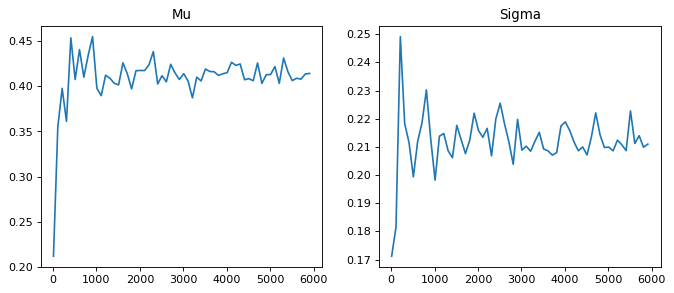

In [16]:
fig, axs = plt.subplots(1, 2,figsize=(10, 4), dpi=80)
axs[0].set_title('Mu')
axs[0].plot(range(10,6000,100),listaVarMu)
axs[1].set_title('Sigma')
axs[1].plot(range(10,6000,100),listaVarSigma)

In [17]:
#Intervalo de confianza para mu (95%)
vari = listaVarMu[len(listaVarMu)-1]
#print(vari)
rango = 1.96*math.sqrt(vari)
display(Math('%0.2f \pm %0.2f' % (maxVerMu, rango )))

<IPython.core.display.Math object>

In [18]:
#Intervalo de confianza para sigma (95%)
vari = listaVarSigma[len(listaVarSigma)-1]
#print(vari)
rango = 1.96*math.sqrt(vari)
display(Math('%0.2f \pm %0.2f' % (maxVerSigma, rango )))

<IPython.core.display.Math object>

### R: 
Se puede aprecia que al rededor de las 2000 simulaciones para mu y 1000 para sigma, hay una convergencia para estos datos, por lo que desde esos valores es más preciso

Podemos observa que los valores son muy cercanos entre si, lo que nos puede indicar que si se hacen más simulaciones con boostrap se podría aumentar su convergencia, de la pregunta 1 tenemos que vale 11.65 ± 1.03 y para la pregunta dos calculamos y nos dió 12.22 ± 1.29, siendo la mediana calculada 0.57 mayor, y sigma 0.26 también mayor, aunmentando un poco el rango de la varianza.   (#Si se ejecuto nuevamente van a cambiar estos valores pero no mucho)